# Tutorial 3 for JetSeT 

In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))

import matplotlib

from matplotlib import pyplot as plt

import matplotlib.colors as mcolors

font = {'family' : 'sans-serif',
        'weight' : 'normal',
        'size'   : 18}

matplotlib.rc('font', **font)
matplotlib.pyplot.rc('font', **font)

colors=list(mcolors.BASE_COLORS)

import warnings
warnings.filterwarnings('ignore')
import numpy as np

/var/folders/s7/r9g9gczx6_l06sdj1hh494_r0000gn/T/ipykernel_41235/2711905457.py:1: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML


![EC model](images/jetset_EC_scheme.png)


In [2]:
from jetset.jet_model import Jet
from jetset.plot_sedfit import PlotSED

In [3]:
from jetset.jet_model import Jet

my_jet=Jet(name='BLR example',electron_distribution='bkn',beaming_expr='bulk_theta')
my_jet.add_EC_component(['EC_BLR','EC_Disk'])
my_jet.show_model()
my_jet.set_par('disk_type',val='MultiBB')
    


--------------------------------------------------------------------------------
jet model description
--------------------------------------------------------------------------------
name: BLRexample  

electrons distribution:
 type: bkn  
 gamma energy grid size:  201
 gmin grid : 2.000000e+00
 gmax grid : 1.000000e+06
 normalization  True
 log-values  False

accretion disk:
 disk Type: BB
 L disk: 1.000000e+45 (erg/s)
 T disk: 1.000000e+05 (K)
 nu peak disk: 8.171810e+15 (Hz)

radiative fields:
 seed photons grid size:  100
 IC emission grid size:  100
 source emissivity lower bound :  1.000000e-120
 spectral components:
   name:Sum, state: on
   name:Sync, state: self-abs
   name:SSC, state: on
   name:EC_BLR, state: on
   name:Disk, state: on
   name:EC_Disk, state: on
external fields transformation method: blob

SED info:
 nu grid size jetkernel: 1000
 nu size: 500
 nu mix (Hz): 1.000000e+06
 nu max (Hz): 1.000000e+30

flux plot lower bound   :  1.000000e-30

-------------------

model name,name,par type,units,val,phys. bound. min,phys. bound. max,log,frozen
BLRexample,R,region_size,cm,5.000000e+15,1.000000e+03,1.000000e+30,False,False
BLRexample,R_H,region_position,cm,1.000000e+17,0.000000e+00,--,False,True
BLRexample,B,magnetic_field,gauss,1.000000e-01,0.000000e+00,--,False,False
BLRexample,theta,jet-viewing-angle,deg,1.000000e-01,0.000000e+00,--,False,False
BLRexample,BulkFactor,jet-bulk-factor,lorentz-factor*,1.000000e+01,1.000000e+00,--,False,False
BLRexample,z_cosm,redshift,,1.000000e-01,0.000000e+00,--,False,False
BLRexample,gmin,low-energy-cut-off,lorentz-factor*,2.000000e+00,1.000000e+00,1.000000e+09,False,False
BLRexample,gmax,high-energy-cut-off,lorentz-factor*,1.000000e+06,1.000000e+00,1.000000e+15,False,False
BLRexample,N,emitters_density,1 / cm3,1.000000e+02,0.000000e+00,--,False,False
BLRexample,gamma_break,turn-over-energy,lorentz-factor*,1.000000e+04,1.000000e+00,1.000000e+09,False,False


--------------------------------------------------------------------------------


In [4]:
my_jet.set_par('L_Disk',val=5E46)
my_jet.set_par('gmax',val=1E4)
my_jet.set_par('gmin',val=2.)
my_jet.set_par('R_H',val=3E17)

my_jet.set_par('p',val=1.5)
my_jet.set_par('p_1',val=3.5)
my_jet.set_par('R',val=3E16)
my_jet.set_par('B',val=2.0)
my_jet.set_par('z_cosm',val=0.6)
my_jet.set_par('BulkFactor',val=20)
my_jet.set_par('theta',val=1)
my_jet.set_par('gamma_break',val=2E2)
my_jet.set_N_from_nuLnu(nu_src=3E12,nuLnu_src=1E47)
my_jet.set_IC_nu_size(100)

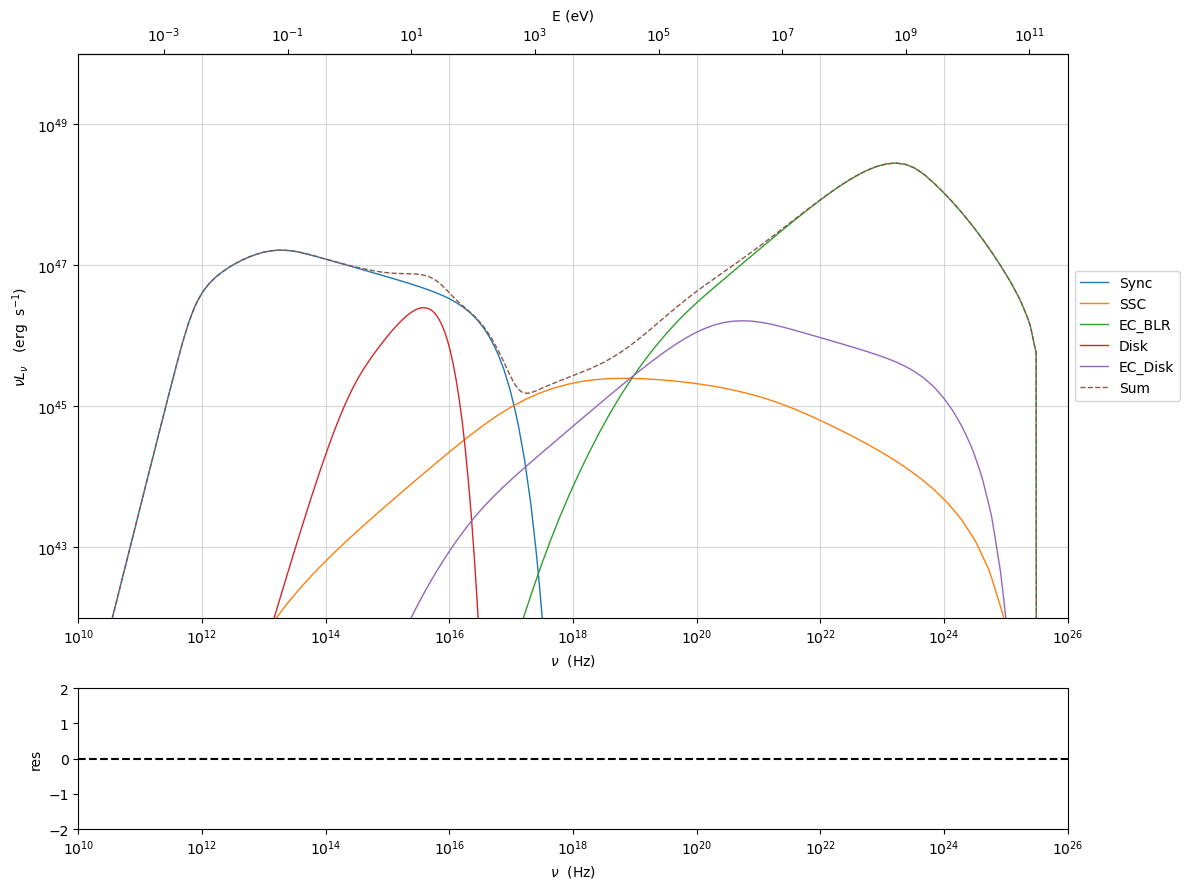

In [5]:
matplotlib.rc('font', **font)
p=PlotSED(figsize=(12,9),frame='src')
my_jet.eval()
p=my_jet.plot_model(plot_obj=p,frame='src')
p.setlim(x_min=1E10,x_max=1E26,y_max=1E50,y_min=1E42)

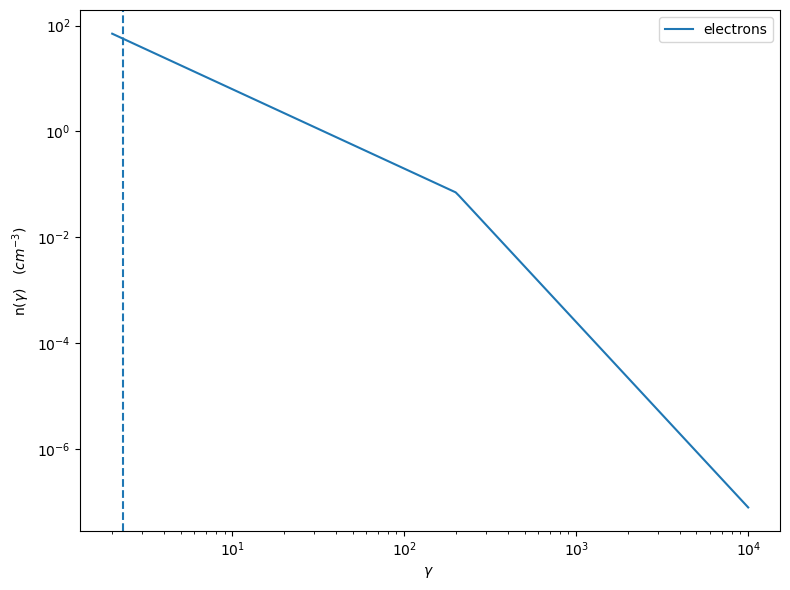

In [6]:
p=my_jet.electron_distribution.plot()
p.ax.axvline(np.log10(my_jet.parameters.gamma_break.val),ls='--')

In [7]:
matplotlib.rc('font', **font)
my_jet.add_EC_component('EC_DT')
my_jet.show_model()


--------------------------------------------------------------------------------
jet model description
--------------------------------------------------------------------------------
name: BLRexample  

electrons distribution:
 type: bkn  
 gamma energy grid size:  201
 gmin grid : 2.000000e+00
 gmax grid : 1.000000e+04
 normalization  True
 log-values  False

accretion disk:
 disk Type: BB
 L disk: 5.000000e+46 (erg/s)
 T disk: 7.500322e+04 (K)
 nu peak disk: 6.129121e+15 (Hz)

radiative fields:
 seed photons grid size:  100
 IC emission grid size:  100
 source emissivity lower bound :  1.000000e-120
 spectral components:
   name:Sum, state: on
   name:Sync, state: self-abs
   name:SSC, state: on
   name:EC_BLR, state: on
   name:Disk, state: on
   name:EC_Disk, state: on
   name:EC_DT, state: on
   name:DT, state: on
external fields transformation method: blob

SED info:
 nu grid size jetkernel: 1000
 nu size: 500
 nu mix (Hz): 1.000000e+06
 nu max (Hz): 1.000000e+30

flux plot low

model name,name,par type,units,val,phys. bound. min,phys. bound. max,log,frozen
BLRexample,R,region_size,cm,3.000000e+16,1.000000e+03,1.000000e+30,False,False
BLRexample,R_H,region_position,cm,3.000000e+17,0.000000e+00,--,False,True
BLRexample,B,magnetic_field,gauss,2.000000e+00,0.000000e+00,--,False,False
BLRexample,theta,jet-viewing-angle,deg,1.000000e+00,0.000000e+00,--,False,False
BLRexample,BulkFactor,jet-bulk-factor,lorentz-factor*,2.000000e+01,1.000000e+00,--,False,False
BLRexample,z_cosm,redshift,,6.000000e-01,0.000000e+00,--,False,False
BLRexample,gmin,low-energy-cut-off,lorentz-factor*,2.000000e+00,1.000000e+00,1.000000e+09,False,False
BLRexample,gmax,high-energy-cut-off,lorentz-factor*,1.000000e+04,1.000000e+00,1.000000e+15,False,False
BLRexample,N,emitters_density,1 / cm3,2.584166e+02,0.000000e+00,--,False,False
BLRexample,gamma_break,turn-over-energy,lorentz-factor*,2.000000e+02,1.000000e+00,1.000000e+09,False,False


--------------------------------------------------------------------------------


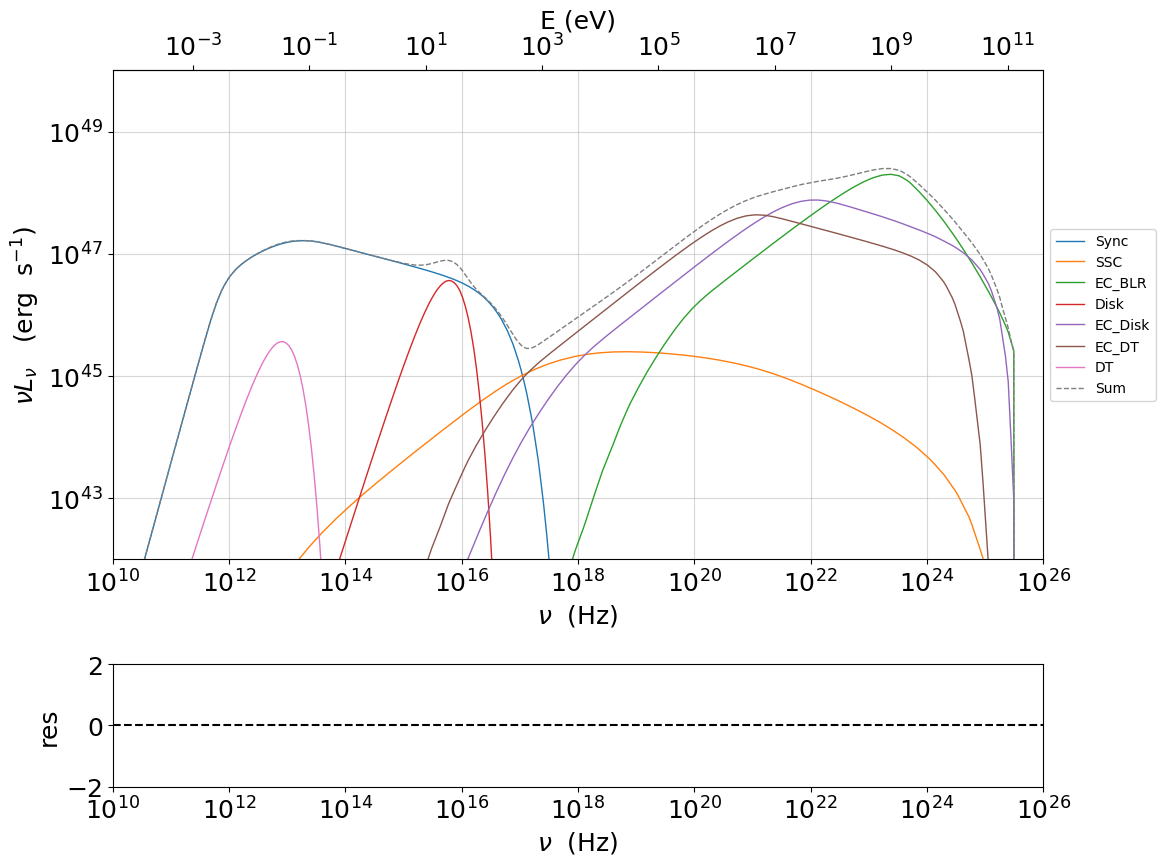

In [8]:
matplotlib.rc('font', **font)
p=PlotSED(figsize=(12,9),frame='src')
my_jet.eval()
p=my_jet.plot_model(plot_obj=p,frame='src')
p.setlim(x_min=1E10,x_max=1E26,y_max=1E50,y_min=1E42)

### setting the BLR and DT radius as a function of the disk luminosity

Using the depending parameters (see :ref:`depending_parameters`, for more details) we can set the BLR and DT radius, as a function of the disk luminosity

In [9]:
#kaspi+ 2007:https://iopscience.iop.org/article/10.1086/512094/pdf
my_jet.make_dependent_par(par='R_BLR_in', depends_on=['L_Disk'], par_expr='1E17*(L_Disk/1E45)**0.5')

my_jet.make_dependent_par(par='R_BLR_out', depends_on=['R_BLR_in'], par_expr='R_BLR_in*1.1')

#Cleary+ 2007:https://iopscience.iop.org/article/10.1086/511969/pdf
my_jet.make_dependent_par(par='R_DT', depends_on=['L_Disk'], par_expr='2.5E18*(L_Disk/1E45)**0.5')


==> par R_BLR_in is now depending on ['L_Disk'] according to expr:R_BLR_in =
1E17*(L_Disk/1E45)**0.5
==> par R_BLR_out is now depending on ['R_BLR_in'] according to expr:R_BLR_out =
R_BLR_in*1.1
==> par R_DT is now depending on ['L_Disk'] according to expr:R_DT =
2.5E18*(L_Disk/1E45)**0.5


In [10]:
from jetset.poly_fit import do_log_Parab_FIT

def get_gamma_3p(j):
    #j.set_gamma_grid_size(1000)
    j.electron_distribution.update()
    
    x=np.log10(j.electron_distribution.gamma)
    y=np.log10(j.electron_distribution.n_gamma)+3*x
    y_p=y.max()
    x_p=x[np.argmax(y)]
    p,err=do_log_Parab_FIT(x,y,x_p,y_p,-1,x_range=[x_p-0.5,x_p+0.5],dy=np.ones(x.size))
    return p

def get_log_par_peak(x_p,y_p,j,comp):
    c=j.get_spectral_component_by_name(comp)
    x=np.log10(c.SED.nu.value)
    y=np.log10(c.SED.nuFnu.value)
    
    p,err=do_log_Parab_FIT(x,y,x_p,y_p,-0.1,x_range=[x_p,x_p+1],dy=np.ones(x.size))
    p,err=do_log_Parab_FIT(x,y,p[0],p[1],p[2],x_range=[p[0],p[0]+1],dy=np.ones(x.size))
   
    return p,err

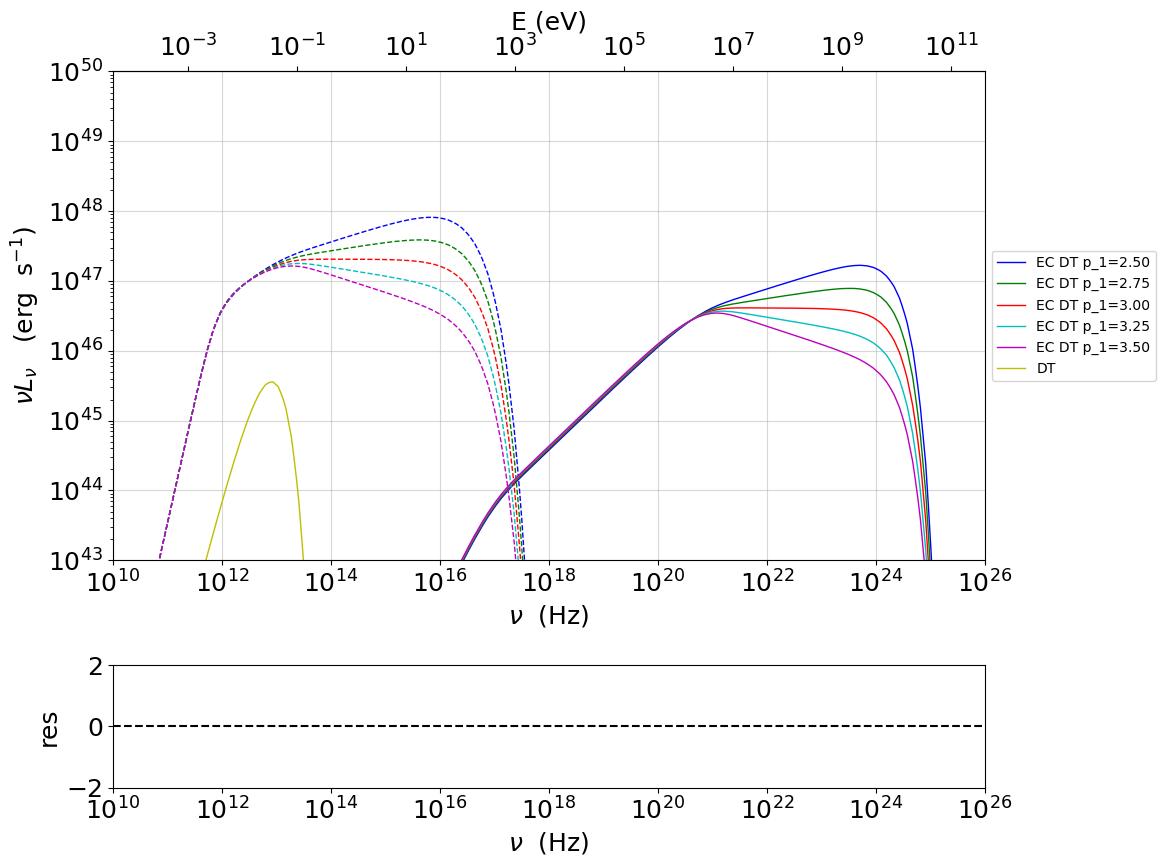

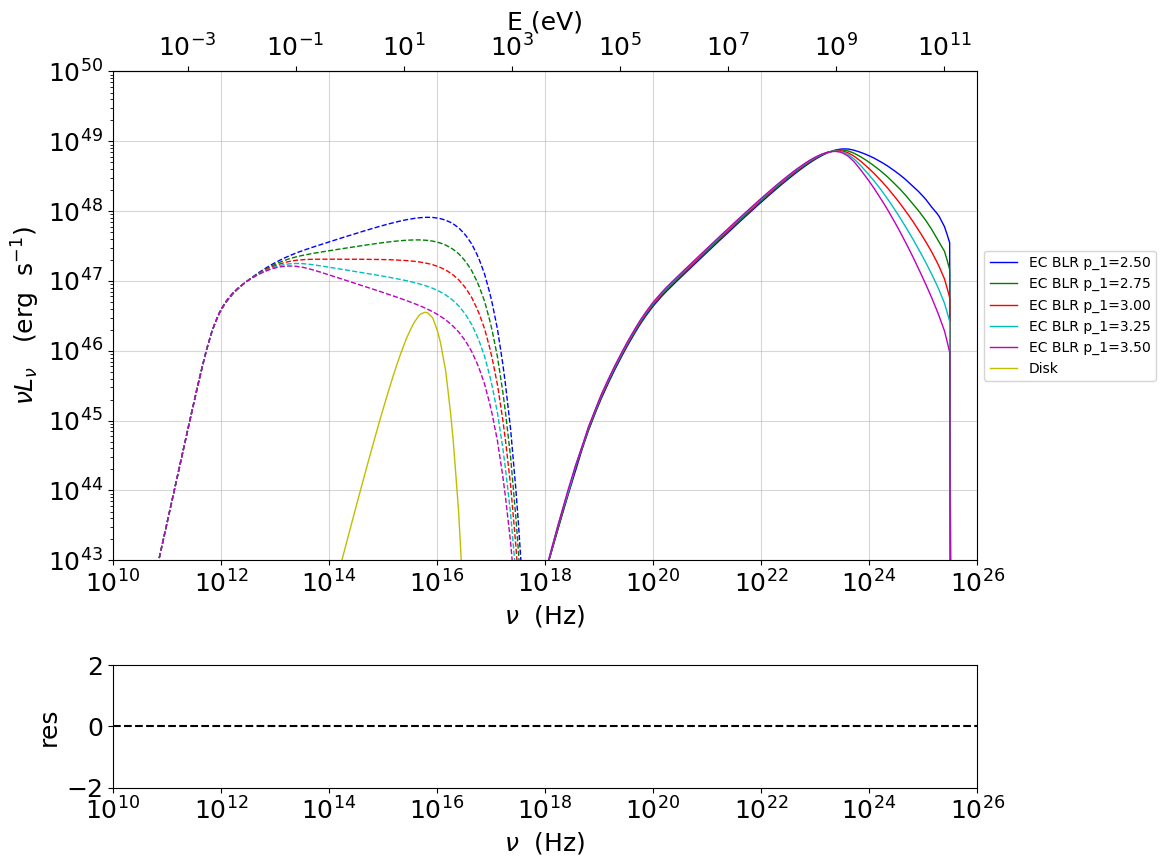

In [11]:
matplotlib.rc('font', **font)

my_jet.set_par('R_H',val=1E17)

size=5
p_dt=PlotSED(figsize=(12,9),frame='src')
p_blr=PlotSED(figsize=(12,9),frame='src')
my_jet.set_nu_grid_size(200)
my_jet.set_IC_nu_size(200)
my_jet.set_gamma_grid_size(100)
nu_IC_curv=np.zeros(size)
nu_IC_curv_err=np.zeros(size)
p1_val=np.zeros(size)
for ID,p_1 in enumerate(np.linspace(2.5,3.5,5)):
    p1_val[ID]=p_1
    my_jet.parameters.p_1.val=p_1
    my_jet.set_N_from_nuLnu(nu_src=3E12,nuLnu_src=1E47)

    my_jet.eval()
    
    my_jet.plot_model(plot_obj=p_blr,comp='Sync',label=None,auto_label=False,line_style='--',color=colors[ID],frame='src')
    my_jet.plot_model(plot_obj=p_dt,comp='Sync',label=None,auto_label=False,line_style='--',color=colors[ID],frame='src')
    #my_jet.plot_model(plot_obj=p_blr,comp='Sum',label='p_1=%2.2f'%p_1,color=colors[ID])
    #my_jet.plot_model(plot_obj=p_dt,comp='Sum',label='p_1=%2.2f'%p_1,color=colors[ID])
    my_jet.plot_model(plot_obj=p_blr,comp='EC_BLR',label='EC BLR p_1=%2.2f'%p_1,color=colors[ID],auto_label=False,frame='src')
    x_p,y_p=my_jet.get_component_peak('EC_BLR',log_log=True)
    (_,_,nu_IC_curv[ID]),err=get_log_par_peak(x_p,y_p,my_jet,'EC_BLR')
    nu_IC_curv_err[ID]=err[2]
    my_jet.plot_model(plot_obj=p_dt,comp='EC_DT',label='EC DT p_1=%2.2f'%p_1,color=colors[ID],auto_label=False,frame='src')

my_jet.plot_model(plot_obj=p_dt,comp='DT',color=colors[ID+1],frame='src')
my_jet.plot_model(plot_obj=p_blr,comp='Disk',color=colors[ID+1],frame='src')

p_dt.setlim(x_min=1E10,x_max=1E26,y_max=1E50,y_min=1E43)
p_blr.setlim(x_min=1E10,x_max=1E26,y_max=1E50,y_min=1E43)

Text(0.5, 0, 'p_1')

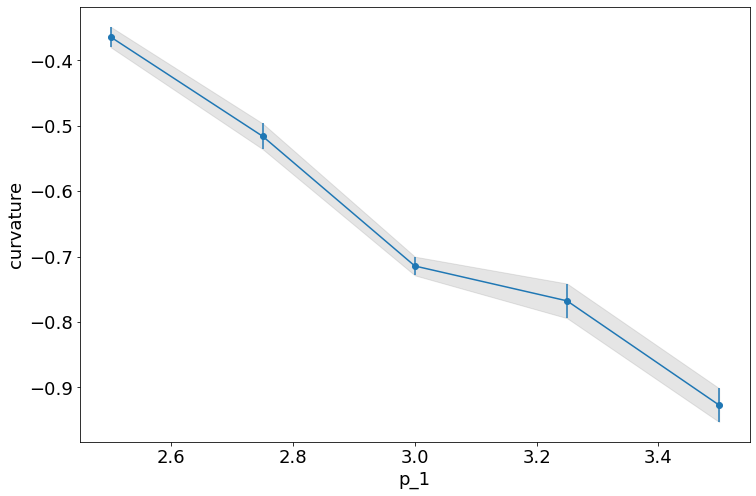

In [12]:
matplotlib.rc('font', **font)

fig = plt.figure(figsize=(12,8))

ax=fig.add_subplot(111)
ax.errorbar(p1_val,nu_IC_curv,yerr=nu_IC_curv_err,fmt='-o',label='EC BLR fit above the peak')
ax.fill_between(p1_val, nu_IC_curv - nu_IC_curv_err, nu_IC_curv + nu_IC_curv_err,
                 color='gray', alpha=0.2)
ax.set_ylabel(r'curvature')
ax.set_xlabel(r'p_1')
#ax.legend(fontsize='large',loc='lower left')

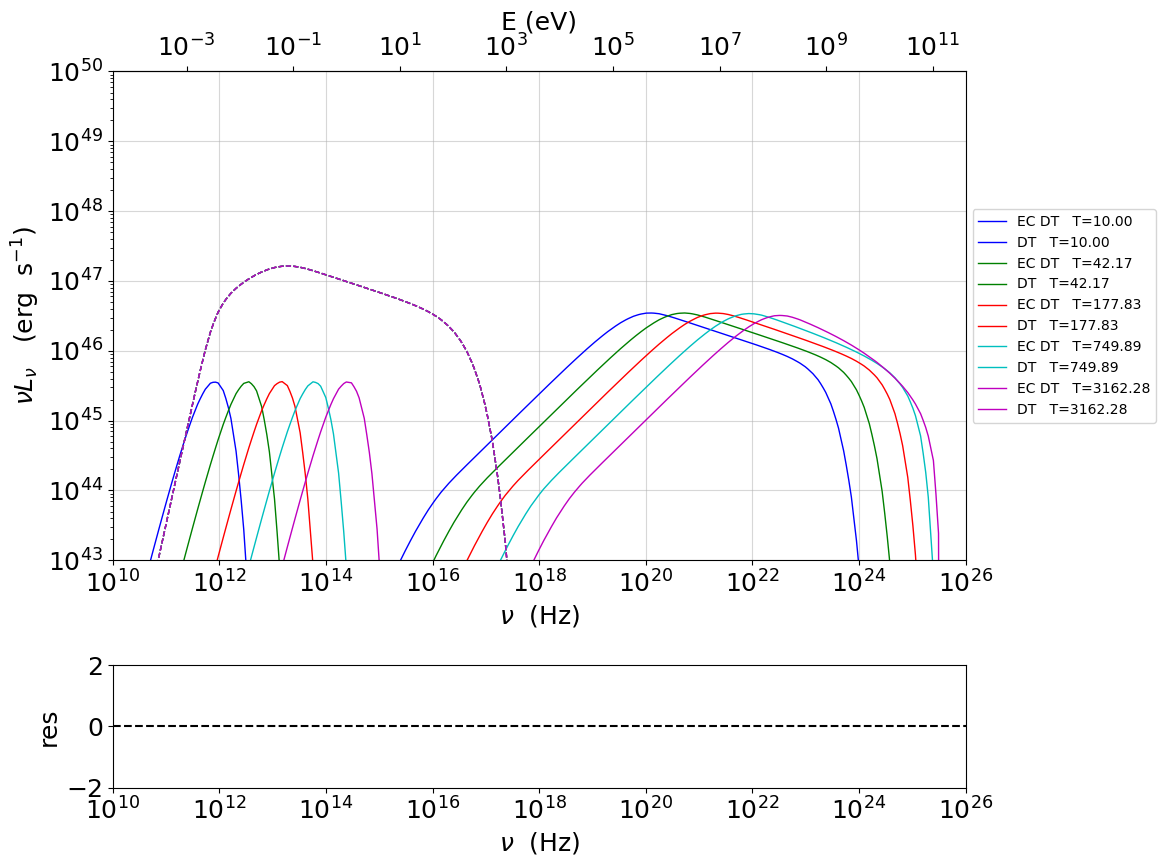

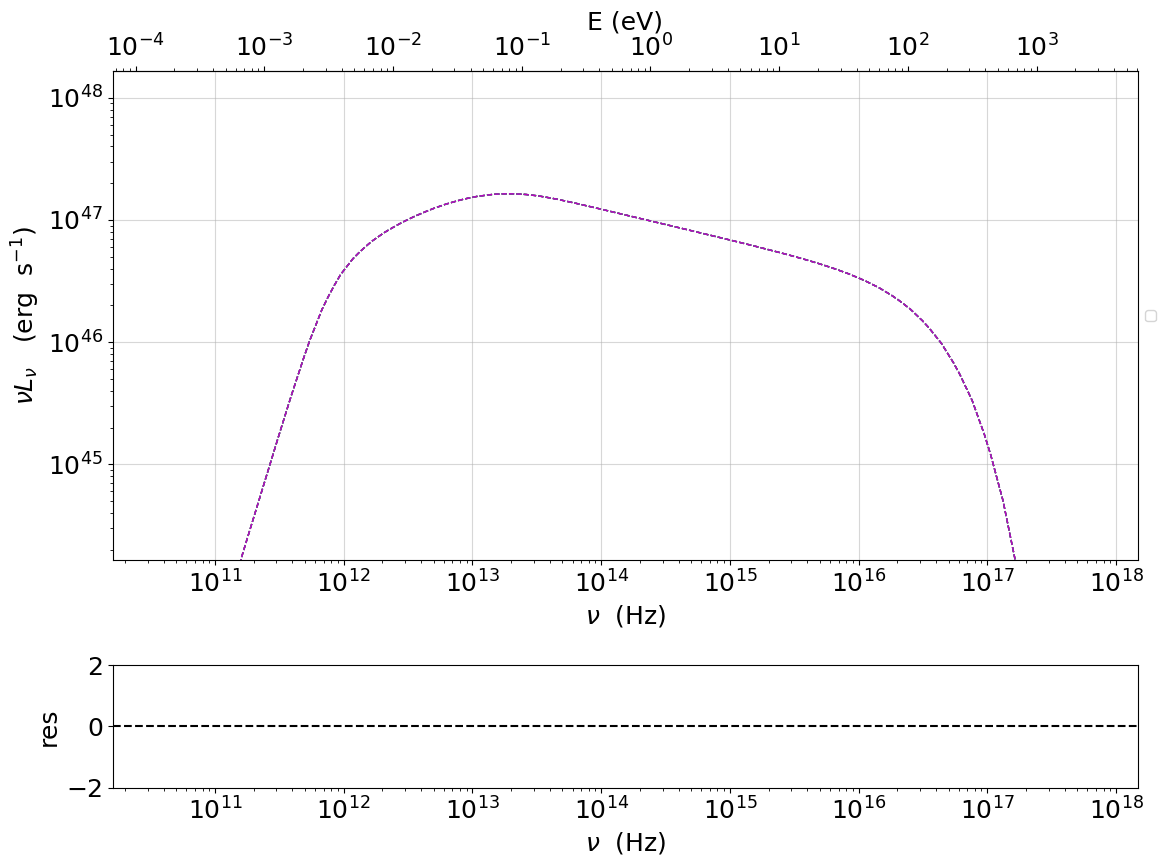

In [13]:
matplotlib.rc('font', **font)

my_jet.set_par('R_H',val=1E17)

size=5
p_dt=PlotSED(figsize=(12,9),frame='src')
p_blr=PlotSED(figsize=(12,9),frame='src')
my_jet.set_nu_grid_size(200)
my_jet.set_IC_nu_size(200)
my_jet.set_gamma_grid_size(100)
nu_IC_curv=np.zeros(size)
nu_IC_curv_err=np.zeros(size)
T_DT_val=np.zeros(size)
for ID,T_DT in enumerate(np.logspace(1,3.5,size)):
    p1_val[ID]=p_1
    my_jet.parameters.T_DT.val=T_DT
    my_jet.set_N_from_nuLnu(nu_src=3E12,nuLnu_src=1E47)

    my_jet.eval()
    
    my_jet.plot_model(plot_obj=p_blr,comp='Sync',label=None,auto_label=False,line_style='--',color=colors[ID],frame='src')
    my_jet.plot_model(plot_obj=p_dt,comp='Sync',label=None,auto_label=False,line_style='--',color=colors[ID],frame='src')
    
    my_jet.plot_model(plot_obj=p_dt,comp='EC_DT',label='EC DT   T=%2.2f'%T_DT,color=colors[ID],auto_label=False,frame='src')

    my_jet.plot_model(plot_obj=p_dt,comp='DT',color=colors[ID], label='DT   T=%2.2f'%T_DT,frame='src')

p_dt.setlim(x_min=1E10,x_max=1E26,y_max=1E50,y_min=1e43)

## Changing the external field transformation


In [14]:
my_jet.set_external_field_transf('blob')


In [15]:
my_jet.set_external_field_transf('disk')


In [16]:
def iso_field_transf(L,R,BulckFactor):
    beta=1.0 - 1/(BulckFactor*BulckFactor)
    return L/(4*np.pi*R*R*3E10)*BulckFactor*BulckFactor*(1+((beta**2)/3))

def external_iso_behind_transf(L,R,BulckFactor):
    beta=1.0 - 1/(BulckFactor*BulckFactor)
    return L/((4*np.pi*R*R*3E10)*(BulckFactor*BulckFactor*(1+beta)**2))

EC seed photon fields, in the Disk rest frame



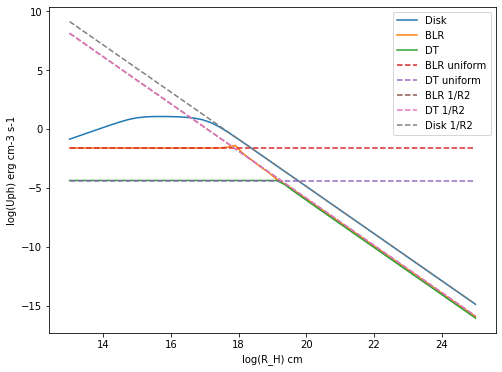

In [17]:
%matplotlib inline
fig = plt.figure(figsize=(8,6))
ax=fig.subplots(1)
N=50
G=1
R_range=np.logspace(13,25,N)
y=np.zeros((8,N))
my_jet.set_verbosity(0)

for ID,R in enumerate(R_range):
    my_jet.set_par('R_H',val=R)
    my_jet.set_external_fields()
    my_jet.energetic_report(verbose=False)
    
    y[1,ID]=my_jet.energetic_dict['U_BLR_DRF']
    y[0,ID]=my_jet.energetic_dict['U_Disk_DRF']
    y[2,ID]=my_jet.energetic_dict['U_DT_DRF']
    
y[4,:]=iso_field_transf(my_jet._blob.L_Disk_radiative*my_jet.parameters.tau_DT.val,my_jet.parameters.R_DT.val,G)
y[3,:]=iso_field_transf(my_jet._blob.L_Disk_radiative*my_jet.parameters.tau_BLR.val,my_jet.parameters.R_BLR_in.val,G)
y[5,:]=external_iso_behind_transf(my_jet._blob.L_Disk_radiative*my_jet.parameters.tau_BLR.val,R_range,G)
y[6,:]=external_iso_behind_transf(my_jet._blob.L_Disk_radiative*my_jet.parameters.tau_DT.val,R_range,G)
y[7,:]=external_iso_behind_transf(my_jet._blob.L_Disk_radiative,R_range,G)

ax.plot(np.log10(R_range),np.log10(y[0,:]),label='Disk')
ax.plot(np.log10(R_range),np.log10(y[1,:]),'-',label='BLR')
ax.plot(np.log10(R_range),np.log10(y[2,:]),label='DT')
ax.plot(np.log10(R_range),np.log10(y[3,:]),'--',label='BLR uniform')
ax.plot(np.log10(R_range),np.log10(y[4,:]),'--',label='DT uniform')
ax.plot(np.log10(R_range),np.log10(y[5,:]),'--',label='BLR 1/R2')
ax.plot(np.log10(R_range),np.log10(y[6,:]),'--',label='DT 1/R2')
ax.plot(np.log10(R_range),np.log10(y[7,:]),'--',label='Disk 1/R2')
ax.set_xlabel('log(R_H) cm')
ax.set_ylabel('log(Uph) erg cm-3 s-1')

ax.legend()


EC seed photon fields, in the blob rest frame

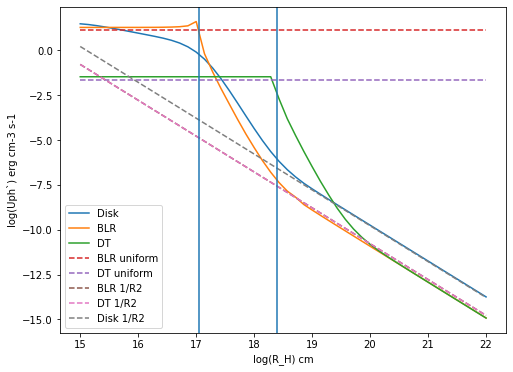

In [18]:
%matplotlib inline

fig = plt.figure(figsize=(8,6))
ax=fig.subplots(1)

L_Disk=1E45
N=50
G=my_jet.parameters.BulkFactor.val
R_range=np.logspace(15,22,N)
y=np.zeros((8,N))
my_jet.set_par('L_Disk',val=L_Disk)
my_jet._blob.theta_n_int=100
my_jet._blob.l_n_int=100
my_jet._blob.theta_n_int=100
my_jet._blob.l_n_int=100
for ID,R in enumerate(R_range):
    my_jet.set_par('R_H',val=R)
    
    my_jet.set_external_fields()
    my_jet.energetic_report(verbose=False)
    
    y[1,ID]=my_jet.energetic_dict['U_BLR']
    y[0,ID]=my_jet.energetic_dict['U_Disk']
    y[2,ID]=my_jet.energetic_dict['U_DT']
    


y[4,:]=iso_field_transf(my_jet._blob.L_Disk_radiative*my_jet.parameters.tau_DT.val,my_jet.parameters.R_DT.val,G)
y[3,:]=iso_field_transf(my_jet._blob.L_Disk_radiative*my_jet.parameters.tau_BLR.val,my_jet.parameters.R_BLR_in.val,G)
y[5,:]=external_iso_behind_transf(my_jet._blob.L_Disk_radiative*my_jet.parameters.tau_BLR.val,R_range,G)
y[6,:]=external_iso_behind_transf(my_jet._blob.L_Disk_radiative*my_jet.parameters.tau_DT.val,R_range,G)
y[7,:]=external_iso_behind_transf(my_jet._blob.L_Disk_radiative,R_range,G)

ax.plot(np.log10(R_range),np.log10(y[0,:]),label='Disk')
ax.plot(np.log10(R_range),np.log10(y[1,:]),'-',label='BLR')
ax.plot(np.log10(R_range),np.log10(y[2,:]),'-',label='DT')
ax.plot(np.log10(R_range),np.log10(y[3,:]),'--',label='BLR uniform')
ax.plot(np.log10(R_range),np.log10(y[4,:]),'--',label='DT uniform')
ax.plot(np.log10(R_range),np.log10(y[5,:]),'--',label='BLR 1/R2')
ax.plot(np.log10(R_range),np.log10(y[6,:]),'--',label='DT 1/R2')
ax.plot(np.log10(R_range),np.log10(y[7,:]),'--',label='Disk 1/R2')
ax.axvline(np.log10( my_jet.parameters.R_DT.val ))
ax.axvline(np.log10( my_jet.parameters.R_BLR_out.val))

ax.set_xlabel('log(R_H) cm')
ax.set_ylabel('log(Uph`) erg cm-3 s-1')

ax.legend()


# Exercise
derive the trend for the Compton dominance (CD) as a function of gmin, B, and BulkFactor

hint: use the get_component_peak to extract the peak of the SED for each component

## IC against the CMB


In [19]:
my_jet=Jet(name='test_equipartition',electron_distribution='lppl',beaming_expr='bulk_theta')
my_jet.set_par('R',val=1E21)
my_jet.set_par('z_cosm',val= 0.651)
my_jet.set_par('B',val=2E-5)
my_jet.set_par('gmin',val=50)
my_jet.set_par('gamma0_log_parab',val=35.0E3)
my_jet.set_par('gmax',val=30E5)
my_jet.set_par('theta',val=12.0)
my_jet.set_par('BulkFactor',val=3.5)
my_jet.set_par('s',val=2.58)
my_jet.set_par('r',val=0.42)
my_jet.set_N_from_nuFnu(5E-15,1E12)
my_jet.add_EC_component('EC_CMB')

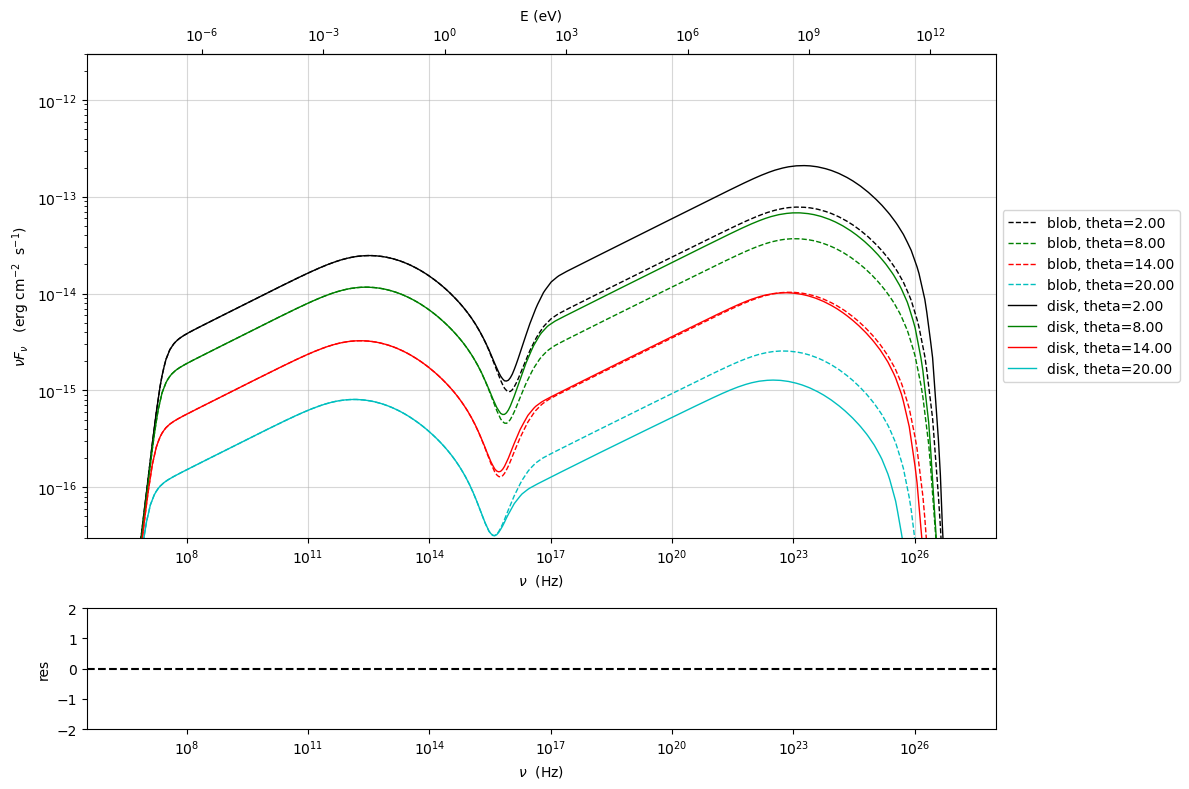

In [20]:
from jetset.plot_sedfit import PlotSED
p=PlotSED()

my_jet.set_external_field_transf('blob')
c= ['k', 'g', 'r', 'c']
for ID,theta in enumerate(np.linspace(2,20,4)):
    my_jet.parameters.theta.val=theta
    my_jet.eval()
    my_jet.plot_model(plot_obj=p,comp='Sum',label='blob, theta=%2.2f'%theta,line_style='--',color=c[ID])

my_jet.set_external_field_transf('disk')
for ID,theta in enumerate(np.linspace(2,20,4)):
    my_jet.parameters.theta.val=theta
    my_jet.eval()
    my_jet.plot_model(plot_obj=p,comp='Sum',label='disk, theta=%2.2f'%theta,line_style='',color=c[ID])

p.setlim(y_min=3E-17,y_max=3E-12,x_max=1E28)

## Equipartition

B grid min  1e-09
B grid max  1.0
grid points 50


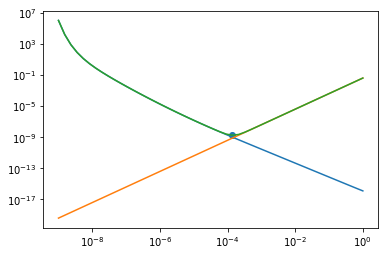

setting B to  0.0001389495494373139
setting N to  9.160733610838076e-06


model name,name,par type,units,val,phys. bound. min,phys. bound. max,log,frozen
test_equipartition,R,region_size,cm,1.000000e+21,1.000000e+03,1.000000e+30,False,False
test_equipartition,R_H,region_position,cm,1.000000e+17,0.000000e+00,--,False,True
test_equipartition,B,magnetic_field,gauss,1.389495e-04,0.000000e+00,--,False,False
test_equipartition,theta,jet-viewing-angle,deg,1.200000e+01,0.000000e+00,--,False,False
test_equipartition,BulkFactor,jet-bulk-factor,lorentz-factor*,3.500000e+00,1.000000e+00,--,False,False
test_equipartition,z_cosm,redshift,,6.510000e-01,0.000000e+00,--,False,False
test_equipartition,gmin,low-energy-cut-off,lorentz-factor*,5.000000e+01,1.000000e+00,1.000000e+09,False,False
test_equipartition,gmax,high-energy-cut-off,lorentz-factor*,3.000000e+06,1.000000e+00,1.000000e+15,False,False
test_equipartition,N,emitters_density,1 / cm3,9.160734e-06,0.000000e+00,--,False,False
test_equipartition,gamma0_log_parab,turn-over-energy,lorentz-factor*,3.500000e+04,1.000000e+00,1.000000e+09,False,False


In [21]:
my_jet.parameters.theta.val=12
B_min,b_grid,U_B,U_e=my_jet.set_B_eq(nuFnu_obs=5E-15,nu_obs=1E12,B_min=1E-9,N_pts=50,plot=True)
my_jet.show_pars()

my_jet.eval()

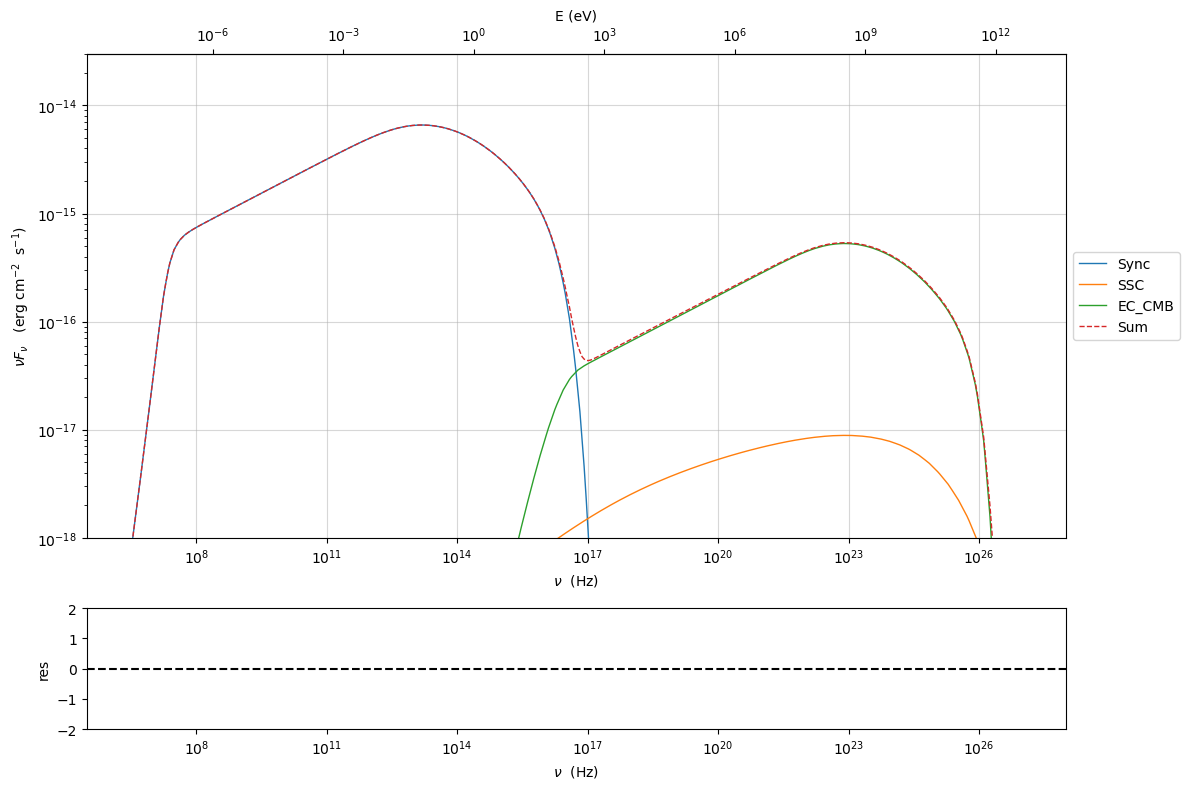

In [29]:
p=my_jet.plot_model()
p.setlim(y_min=1E-18,y_max=3E-14,x_max=1E28)